**PROBLEM STATEMENT**

Skin cancer is the most prevalent type of cancer. Melanoma, specifically, is responsible for 75% of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.

Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.

As the leading healthcare organization for informatics in medical imaging, the Society for Imaging Informatics in Medicine (SIIM)'s mission is to advance medical imaging informatics through education, research, and innovation in a multi-disciplinary community. SIIM is joined by the International Skin Imaging Collaboration (ISIC), an international effort to improve melanoma diagnosis. The ISIC Archive contains the largest publicly available collection of quality-controlled dermoscopic images of skin lesions.

In this competition, you’ll identify melanoma in images of skin lesions. In particular, you’ll use images within the same patient and determine which are likely to represent a melanoma. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.

Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.

![https://thumbs.dreamstime.com/z/woman-skin-cancer-symptoms-blue-background-woman-skin-cancer-symptoms-115995159.jpg](https://thumbs.dreamstime.com/z/woman-skin-cancer-symptoms-blue-background-woman-skin-cancer-symptoms-115995159.jpg)

**What is melanoma?**

Melanoma is a type of skin cancer that develops from the pigment-producing cells called melanocytes. It is considered one of the most aggressive forms of skin cancer and can spread rapidly to other parts of the body if not detected and treated early.

The purpose is to correctly identify the **benign** and **malignant** cases. A benign tumor is a tumor that DOES NOT invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that MAY invade its surrounding tissue or spread around the body.

<img src = 'https://assets.technologynetworks.com/production/dynamic/images/content/364765/benign-vs-malignant-tumors-364765-960x540.jpg?cb=12252466' width = 800>




# IMPORTING THE LIBRARIES

Dataset consists of three main files

**Train.csv**: This file contains information about the training dataset. Each row represents a unique image of a skin lesion along with associated metadata.

* image_name: The unique identifier for each image.
* patient_id: Identifier for the patient associated with the image.
* sex: Gender of the patient.
* age_approx: Approximate age of the patient.
* anatom_site_general_challenge: General anatomical site of the lesion.
* diagnosis: Diagnosis of the lesion.
* benign_malignant: Indicates whether the lesion is benign or malignant.
* target: Binary target variable indicating whether the lesion is malignant (1) or benign (0).

**Test.csv**: This file contains information about the test dataset. 

* image_name: The unique identifier for each image.
* patient_id: Identifier for the patient associated with the image.
* sex: Gender of the patient.
* age_approx: Approximate age of the patient.
* anatom_site_general_challenge: General anatomical site of the lesion.

**Image Files**: The dataset also includes image files referenced in the train and test CSV files. These images are dermoscopic images of skin lesions.

In [1]:
#import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns

# Training and Testing Dataset

In [2]:
import pandas as pd
import os

# Define the directory path
directory = '../input/siim-isic-melanoma-classification'

# Get the file paths
train_file = os.path.join(directory, 'train.csv')
test_file = os.path.join(directory, 'test.csv')

# Read the CSV files
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Print the number of rows in each DataFrame
print('Train has {:,} rows and Test has {:,} rows.'.format(len(train_df), len(test_df)))

# Define new column names
new_names = ['img_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']

# Rename columns
train_df.columns = new_names
test_df.columns = new_names[:5]

# Show the first few rows of each DataFrame
print(train_df.head())
print(test_df.head())


Train has 33,126 rows and Test has 10,982 rows.
       img_name          ID     sex   age          anatomy diagnosis  \
0  ISIC_2637011  IP_7279968    male  45.0        head/neck   unknown   
1  ISIC_0015719  IP_3075186  female  45.0  upper extremity   unknown   
2  ISIC_0052212  IP_2842074  female  50.0  lower extremity     nevus   
3  ISIC_0068279  IP_6890425  female  45.0        head/neck   unknown   
4  ISIC_0074268  IP_8723313  female  55.0  upper extremity   unknown   

  benign_malignant  target  
0           benign       0  
1           benign       0  
2           benign       0  
3           benign       0  
4           benign       0  
       img_name          ID     sex   age          anatomy
0  ISIC_0052060  IP_3579794    male  70.0              NaN
1  ISIC_0052349  IP_7782715    male  40.0  lower extremity
2  ISIC_0058510  IP_7960270  female  55.0            torso
3  ISIC_0073313  IP_6375035  female  50.0            torso
4  ISIC_0073502  IP_0589375  female  45.0  lower e

# **DATA ANALYSIS**

In [3]:
# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", train_df.shape)

Shape of the dataset: (33126, 8)


In [4]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
print(train_df.tail())

Last few rows of the dataset:
           img_name          ID   sex   age          anatomy diagnosis  \
33121  ISIC_9999134  IP_6526534  male  50.0            torso   unknown   
33122  ISIC_9999320  IP_3650745  male  65.0            torso   unknown   
33123  ISIC_9999515  IP_2026598  male  20.0  lower extremity   unknown   
33124  ISIC_9999666  IP_7702038  male  50.0  lower extremity   unknown   
33125  ISIC_9999806  IP_0046310  male  45.0            torso     nevus   

      benign_malignant  target  
33121           benign       0  
33122           benign       0  
33123           benign       0  
33124           benign       0  
33125           benign       0  


In [5]:
# Get information about the dataset
print("Information about the dataset:")
print(train_df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   img_name          33126 non-null  object 
 1   ID                33126 non-null  object 
 2   sex               33061 non-null  object 
 3   age               33058 non-null  float64
 4   anatomy           32599 non-null  object 
 5   diagnosis         33126 non-null  object 
 6   benign_malignant  33126 non-null  object 
 7   target            33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None


In [6]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(train_df.describe())

Summary statistics for numerical columns:
                age        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.000000
50%       50.000000      0.000000
75%       60.000000      0.000000
max       90.000000      1.000000


# **CHECK FOR DUPLICATES**

In [7]:
# Check for duplicates in the DataFrame
duplicates = train_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("No duplicates found in the DataFrame.")
else:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate rows:")
    print(train_df[duplicates])

No duplicates found in the DataFrame.


# **MISSING VALUE CALCULATION**

In [8]:
# Calculate the number of missing values in each column
missing_values = train_df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
img_name              0
ID                    0
sex                  65
age                  68
anatomy             527
diagnosis             0
benign_malignant      0
target                0
dtype: int64


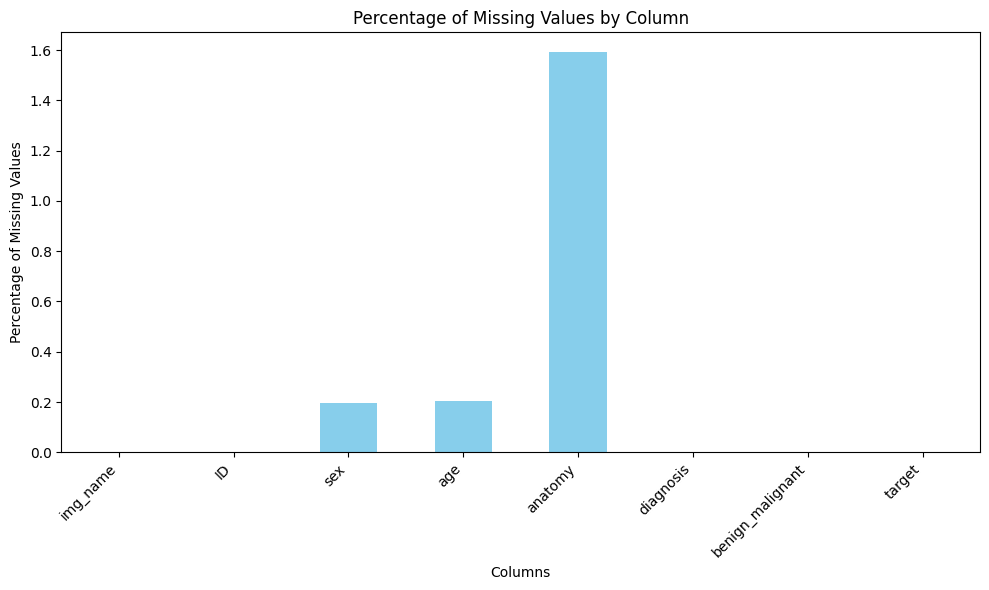

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of missing values in each column
missing_values_percent = (train_df.isnull().sum() / len(train_df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [10]:
from sklearn.impute import SimpleImputer

# Display the count of missing values before imputation
print("Missing Values Before Imputation:")
print(train_df.isnull().sum())

# Identify columns with non-numeric data
non_numeric_columns = train_df.select_dtypes(exclude=['number']).columns

# Impute missing values with mean for numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
imputer_mean = SimpleImputer(strategy='mean')
train_df[numeric_columns] = imputer_mean.fit_transform(train_df[numeric_columns])

# Impute missing values with most frequent for non-numeric columns
imputer_mode = SimpleImputer(strategy='most_frequent')
train_df[non_numeric_columns] = imputer_mode.fit_transform(train_df[non_numeric_columns])

# Display the count of missing values after imputation
print("\nMissing Values After Imputation:")
print(train_df.isnull().sum())

Missing Values Before Imputation:
img_name              0
ID                    0
sex                  65
age                  68
anatomy             527
diagnosis             0
benign_malignant      0
target                0
dtype: int64

Missing Values After Imputation:
img_name            0
ID                  0
sex                 0
age                 0
anatomy             0
diagnosis           0
benign_malignant    0
target              0
dtype: int64


# EDA (trends,patterns, outliers,insigihts,missing values)

* The provided code performs exploratory data analysis (EDA) on the SIIM-ISIC Melanoma Classification dataset.
* It includes visualization of the distribution of the target variable ('target'), relationships between numerical variables ('age_approx', 'diagnosis', 'benign_malignant', 'sex') using pairplots, and the distribution of anatomical sites by gender. 
* Each visualization helps to understand the dataset's characteristics, including the distribution of target classes, patterns among numerical variables, and relationships between categorical variables.
* These insights can inform further analysis and modeling decisions.

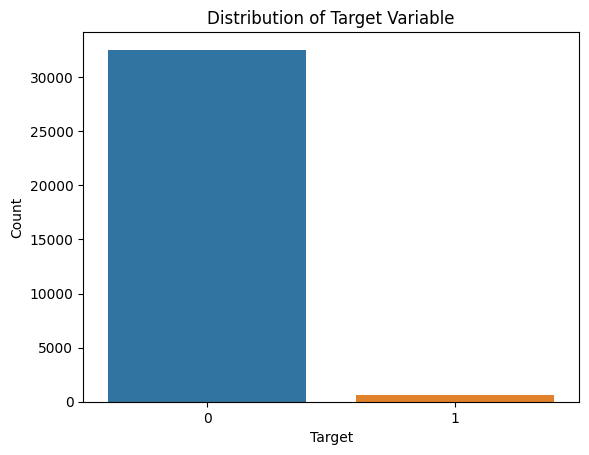

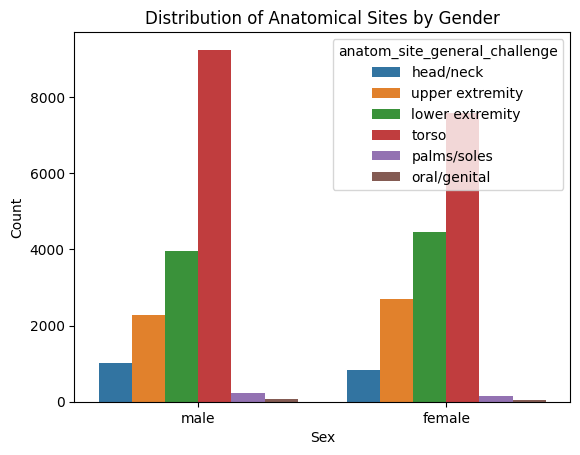

In [11]:
# Trend of target variable
data = pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv")
sns.countplot(data=data, x='target')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Patterns: Relationships between categorical variables
sns.countplot(data=data, x='sex', hue='anatom_site_general_challenge' )
plt.title('Distribution of Anatomical Sites by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


* Distribution of Target Variable - The analysis reveals that the count of target 0 surpasses the count of target 1, as illustrated by the bar chart.

* The bar chart illustrates that in the distribution of anatomical sites by gender, males exhibit a higher incidence of melanoma compared to females. Additionally, for both genders, the torso emerges as the predominant anatomical site affected by melanoma

In [ ]:
# Selecting suitable categorical columns for count plots
categorical_cols = ['sex', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant', 'target']

# Count plot for outliers detection
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data, x=col)
    plt.title(f'Count plot of {col}')
    plt.xlabel('Values')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


The count plot analysis reveals the following insights:

**Sex Distribution:**
* Male count exceeds female count.

**Anatomical Site Distribution:**
* The torso is the most frequent anatomical site, while oral/genital is the least frequent.

**Diagnosis Distribution:**
* Instances of unknown diagnosis outnumber instances of known diagnosis. 

**Benign/Malignant Distribution:**
* Benign cases outnumber malignant cases.

**Target Distribution:**
* The count of target 0 instances surpasses the count of target 1 instances.

# **Bivariate Analysis**

* The provided code creates a count plot using Seaborn to visualize the frequency of different anatomical sites across various age groups.
* The x-axis represents age approximation, while the y-axis shows the frequency of occurrences.
* Each bar on the plot corresponds to a specific age group, with different colors indicating different anatomical sites.
* The legend provides information about the anatomical sites represented by each color.
* This visualization helps to understand the distribution of anatomical sites across different age groups in the dataset.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a count plot to visualize the frequency of anatomical sites across different age groups
plt.figure(figsize=(20, 12))
sns.countplot(data=train_df, x='age', hue='anatomy')
plt.title('Frequency of Anatomical Sites Across Age Groups')
plt.xlabel('Age Approximation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Anatomical Site')
plt.show()


In the analysis of the frequency of anatomical sites across age groups:

**Age Groups with Higher Melanoma Incidence:**

* Age groups of 45 and older exhibit a higher incidence of melanoma.
* The predominant anatomical site affected by melanoma across these age groups is the torso.

**Age Groups with Lower Melanoma Incidence:**

* Age groups of 10, 15, and 90 have a lower incidence of melanoma.
* The frequency of melanoma occurrences in these age groups is notably lower compared to other age groups.

In [ ]:
# Summary statistics
summary_stats = train_df.describe()
print(summary_stats)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical variables for correlation analysis
numerical_data = train_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# **DATA AUGMENTATION**

* Note: this idea is taken from SIIM Melanoma Competition: EDA + Augmentations notebook

In [12]:
print(train_df.columns)


Index(['img_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis',
       'benign_malignant', 'target'],
      dtype='object')


In [13]:
def show_images(data, n = 5, rows=1, cols=5, title='Default'):
    plt.figure(figsize=(16,4))

    for k, path in enumerate(data['path_dicom'][:n]):
        image = pydicom.read_file(path)
        image = image.pixel_array
        
        # image = resize(image, (200, 200), anti_aliasing=True)

        plt.suptitle(title, fontsize = 16)
        plt.subplot(rows, cols, k+1)
        plt.imshow(image)
        plt.axis('off')

In [14]:
# === DICOM ===
# Create the paths
path_train = directory + '/train/' + train_df['img_name'] + '.dcm'
path_test = directory + '/test/' + test_df['img_name'] + '.dcm'

# Append to the original dataframes
train_df['path_dicom'] = path_train
test_df['path_dicom'] = path_test

# === JPEG ===
# Create the paths
path_train = directory + '/jpeg/train/' + train_df['img_name'] + '.jpg'
path_test = directory + '/jpeg/test/' + test_df['img_name'] + '.jpg'

# Append to the original dataframes
train_df['path_jpeg'] = path_train
test_df['path_jpeg'] = path_test

In [15]:
pip install pydicom

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pydicom
import matplotlib.pyplot as plt

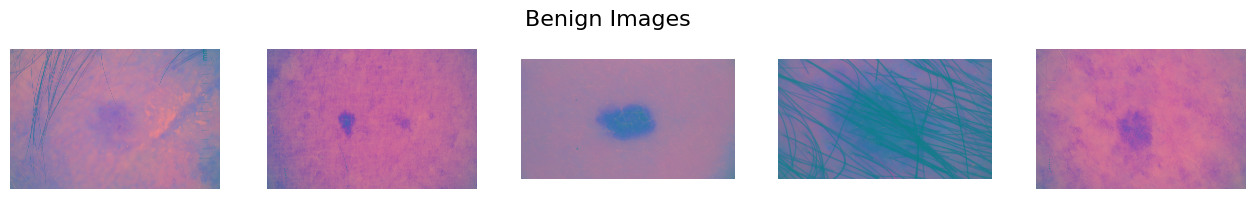

In [17]:
# Show Benign Images
show_images(train_df[train_df['target'] == 0], n=5, rows=2, cols=5, title='Benign Images')

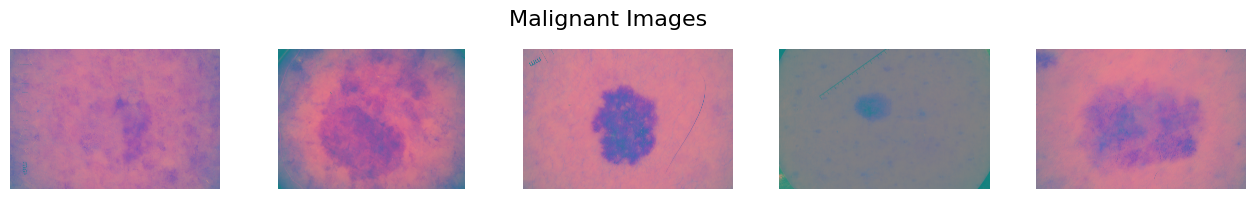

In [18]:
# Show Malignant Images
show_images(train_df[train_df['target'] == 1], n=5, rows=2, cols=5, title='Malignant Images')

In [ ]:
pip install opencv-python

In [ ]:
import cv2
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(16,6))
plt.suptitle("B&W", fontsize = 16)

for i in range(0, 2*6):
    data = pydicom.read_file(train_df['path_dicom'][i])
    image = data.pixel_array
    
    # Transform to B&W
    # The function converts an input image from one color space to another.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (200,200))
    
    x = i // 6
    y = i % 6
    axes[x, y].imshow(image, cmap=plt.cm.bone) 
    axes[x, y].axis('off')

**Without Gaussian kernel**

In [ ]:
import cv2

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 6))
plt.suptitle("With Gaussian Blur", fontsize=16)

for i in range(0, 2*6):
    data = pydicom.read_file(train_df['path_dicom'][i])
    image = data.pixel_array
    
    # Invert the image
    image = 255 - image
    
    # Normalize the image
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Resize the image
    resized_image = cv2.resize(blurred_image, (200, 200))
    
    x = i // 6
    y = i % 6
    axes[x, y].imshow(resized_image, cmap=plt.cm.bone) 
    axes[x, y].axis('off')
    
plt.show()


**With Guassian blur**

cv2.GaussiaBlur(): The function convolves the source image with the specified Gaussian kernel.

In [ ]:
import cv2
import numpy as np
from skimage import exposure  # Import the exposure module from skimage

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 6))
plt.suptitle("With Gaussian Blur", fontsize=16)

for i in range(0, 2 * 6):
    data = pydicom.read_file(train_df['path_dicom'][i])
    image = data.pixel_array
    
    # Convert to grayscale if not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    image = cv2.equalizeHist(image)
    
    # Apply contrast stretching
    p_low, p_high = np.percentile(image, (5, 95))
    image = exposure.rescale_intensity(image, in_range=(p_low, p_high))
    
    # Resize the image
    image = cv2.resize(image, (200, 200))
    
    x = i // 6
    y = i % 6
    axes[x, y].imshow(image, cmap=plt.cm.bone)
    axes[x, y].axis('off')

plt.show()


**Brightness, Hue, and Saturation**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pydicom

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(16,12))
plt.suptitle("Adjusting Brightness, Hue, and Saturation", fontsize=16)

# Brightness factor
brightness_factor = 1.5  # Increase or decrease as needed

# Hue and saturation adjustments
hue_shift = 20  # Increase or decrease hue (0-180)
saturation_scale = 1.5  # Increase or decrease saturation

for i in range(0, 2 * 6):
    # Read the DICOM image
    data = pydicom.read_file(train_df['path_dicom'][i])
    image = data.pixel_array
    
    # Convert image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Brightness adjustment
    brightness_image = cv2.convertScaleAbs(hsv_image, alpha=brightness_factor, beta=0)
    
    # Hue adjustment
    hue_image = cv2.add(hsv_image[:,:,0], hue_shift)
    hue_image = np.clip(hue_image, 0, 179)
    
    # Saturation adjustment
    saturation_image = cv2.convertScaleAbs(hsv_image[:,:,1], alpha=saturation_scale, beta=0)
    
    # Convert back to BGR for displaying
    adjusted_image_bgr = cv2.cvtColor(cv2.merge([hue_image, saturation_image, hsv_image[:,:,2]]), cv2.COLOR_HSV2BGR)
    
    # Plot
    x = i // 6
    y = i % 6
    axes[0, y].imshow(cv2.cvtColor(brightness_image, cv2.COLOR_HSV2RGB))
    axes[0, y].axis('off')
    axes[1, y].imshow(cv2.cvtColor(adjusted_image_bgr, cv2.COLOR_BGR2RGB))
    axes[1, y].axis('off')
    axes[2, y].imshow(cv2.cvtColor(saturation_image, cv2.COLOR_GRAY2RGB))
    axes[2, y].axis('off')

plt.show()


**Cropping lesion region**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function to automatically crop the lesion region
def crop_lesion(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to segment the lesion area
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour (assuming it corresponds to the lesion)
    if contours:
        max_contour = max(contours, key=cv2.contourArea)
        
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(max_contour)
        
        # Crop the region containing the lesion
        cropped_image = image[y:y+h, x:x+w]
        
        return cropped_image
    else:
        return None

# Load and crop 5 sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
plt.suptitle("Cropping Lesion Region in Sample Images", fontsize=16)

for i, path in enumerate(path_train[:5]):  # Assuming path_dicom contains the file paths of 5 sample images
    # Read the image
    image = cv2.imread(path)
    if image is None:
        print(f"Error: Unable to read image at {path}")
        continue
    
    # Crop the lesion region
    cropped_image = crop_lesion(image)
    
    # Plot original and cropped images
    axes[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    
    if cropped_image is not None:
        axes[1, i].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        axes[1, i].set_title('Lesion Region Cropped')
    else:
        axes[1, i].set_title('No Lesion Detected')
    axes[1, i].axis('off')

plt.show()

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Create PyTorch Dataset Object
class DatasetExample(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
    
    # To get item's length
    def __len__(self):
        return len(self.image_list)
    
    # For indexing
    def __getitem__(self, i):
        # Read in image
        image = plt.imread(self.image_list[i])
        if self.transforms:
            image = self.transforms(image)
        return image

# Define transformation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),
    transforms.CenterCrop((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
image_list = [
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0075663.jpg",
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0076742.jpg",
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0078703.jpg",
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0078712.jpg",
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0080512.jpg",
    "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/ISIC_0080752.jpg"
]
# Create the dataset
pytorch_dataset = DatasetExample(image_list=image_list, transforms=transform)
pytorch_dataloader = DataLoader(dataset=pytorch_dataset, batch_size=12, shuffle=True)

# Select the data
images = next(iter(pytorch_dataloader))

# Show images
def show_images(images, title="Default"):
    num_images = len(images)
    rows = (num_images // 6) + 1  # Adjust number of rows based on the number of images

    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)

    for i in range(num_images):
        plt.subplot(rows, 6, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))
        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between subplots

    plt.show()

show_images(images, title="Crop")


**Random Greyscale Conversion**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function for random grayscale conversion
def random_grayscale(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Generate random coefficients for converting to grayscale
    alpha = np.random.uniform(0.1, 0.9)
    beta = np.random.randint(0, 256)
    
    # Apply random grayscale transformation
    random_gray_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)
    
    return random_gray_image

# Load and apply random grayscale conversion to 5 sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
plt.suptitle("Random Grayscale Conversion of Sample Images", fontsize=16)

for i, path in enumerate(path_train[:5]):  # Assuming path_dicom contains the file paths of 5 sample images
    # Read the image
    image = cv2.imread(path)
    if image is None:
        print(f"Error: Unable to read image at {path}")
        continue
    
    # Apply random grayscale conversion
    gray_image = random_grayscale(image)
    
    # Plot original and converted images
    axes[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(gray_image, cmap='gray')
    axes[1, i].set_title('Random Grayscale')
    axes[1, i].axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision  # Add this import statement
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Select a small sample of the .jpeg image paths
image_list = train_df.sample(12)['path_jpeg']
image_list = image_list.reset_index()['path_jpeg']

# Define a function to apply a vertical flip to images
def apply_vertical_flip(image):
    # Apply vertical flip
    flipped_image = cv2.flip(image, 1)  # 1 indicates vertical flip
    return flipped_image

# Define the dataset class
class DatasetExample(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        # Read image from file
        image = Image.open(self.image_list[idx]).convert('RGB')
        
        # Apply transformations
        if self.transforms:
            image = self.transforms(image)
        
        return image

# Define a function to show images
def show_images(images, title="Default"):
    # Unnormalize and show images
    grid_image = images / 2 + 0.5
    np_image = grid_image.numpy()
    np_image = np.transpose(np_image, (1, 2, 0))
    
    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)
    plt.imshow(np_image)
    plt.axis('off')
    plt.show()

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomVerticalFlip(p=0.7),  # Vertical flip
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Create the dataset
pytorch_dataset = DatasetExample(image_list=image_list, transforms=transform)
pytorch_dataloader = DataLoader(dataset=pytorch_dataset, batch_size=12, shuffle=True)

# Select the data
images = next(iter(pytorch_dataloader))

# Apply the vertical flip to images
flipped_images = np.array([apply_vertical_flip(image.permute(1, 2, 0).numpy()) for image in images])

# Show the original and flipped images
show_images(torchvision.utils.make_grid(torch.tensor(images), nrow=6), title="Original")
show_images(torchvision.utils.make_grid(torch.tensor(flipped_images.transpose(0, 3, 1, 2)), nrow=6), title="Random Vertical Flip")


**MODEL**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
import cv2
import pandas as pd
import time
import wandb
from PIL import Image
from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
import torch.nn.functional as F

In [ ]:
PARAMS = {
    'epochs': 10,
    'learning_rate': 0.001,
    'batch_size': 32,
    'optimizer': 'sgd',  # 'adam', 'rmsprop', 'sgd', etc.
    'loss_function': 'cross_entropy', # 'cross_entropy','BCE'
    'momentum': 0.0,  # Add momentum for SGD optimizer
    'model_architecture': 'resnet34',  # Change to any other model
    'train_image_path' : '/kaggle/input/melanoma-resized-images-512512/train/train/',
    'train_csv_path' : '/kaggle/input/siim-isic-melanoma-classification/train.csv',
    'test_image_path' : '/kaggle/input/melanoma-resized-images-512512/test/test/',
    'test_csv_path' : '/kaggle/input/siim-isic-melanoma-classification/test.csv'
    
}

In [ ]:
train_image_path = PARAMS['train_image_path']
test_image_path = PARAMS['test_image_path']

In [ ]:
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize(256, interpolation=2),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),    # Random vertical flip
    transforms.RandomRotation(45),      # Random rotation (-45 to +45 degrees)
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
def load_and_preprocess_images(image_paths, mode='train', transform=None):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        if mode == "test":
            img = cv2.imread(test_image_path + path + '.jpg')  
        else:
            img = cv2.imread(train_image_path + path + '.jpg')
        pil_img = Image.fromarray(img)
        # Apply data transformations if provided
        if transform is not None:
            augmented_img = transform(pil_img)
            
        images.append(np.array(augmented_img))
    return np.array(images)

In [ ]:
# Define the function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        img = cv2.imread(train_image_path + path + '.jpg')
        # Convert image to grayscale
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
    return np.array(images)

In [ ]:
train_df = pd.read_csv(PARAMS['train_csv_path'])
test_df = pd.read_csv(PARAMS['test_csv_path'])
train_df.head()

In [ ]:
class_distribution = train_df['target'].value_counts()
class_distribution

In [ ]:
X = train_df['image_name'] #images
y = train_df['target'] #target

In [ ]:
# Assuming X and y are your original data and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

In [ ]:
undersampled_majority_class = resample(majority_class,
                                        replace=False,
                                        n_samples=len(minority_class),
                                        random_state=42)

In [ ]:
def load_and_preprocess_images(image_paths, mode, transform=None):
    processed_images = []
    for path in image_paths:
        if mode == "train":
            img = cv2.imread(train_image_path + path + '.jpg')
        else:
            img = cv2.imread(test_image_path + path + '.jpg')
        
        if img is None:
            print(f"Failed to load image: {path}")
            continue
        
        pil_img = Image.fromarray(img)
        # Apply data transformations if provided
        if transform is not None:
            pil_img = transform(pil_img)
        
        processed_images.append(pil_img)
    
    return processed_images


In [ ]:
# Load and preprocess images for majority class
undersampled_majority_images = load_and_preprocess_images(undersampled_majority_class,"train",transform=data_transforms)
# Convert labels to float
undersampled_majority_labels = np.zeros(len(undersampled_majority_images))

# Load and preprocess images for minority class
minority_images = load_and_preprocess_images(minority_class,"train",transform=data_transforms)
# Convert labels to float
minority_labels = np.ones(len(minority_images))

In [ ]:
import numpy as np
import torch

# Convert tensors to NumPy arrays
undersampled_majority_images_np = np.array([img.numpy() for img in undersampled_majority_images])
minority_images_np = np.array([img.numpy() for img in minority_images])
undersampled_majority_labels_np = np.array(undersampled_majority_labels)
minority_labels_np = np.array(minority_labels)

# Combine minority class with undersampled majority class
undersampled_X_train = np.concatenate([undersampled_majority_images_np, minority_images_np])
undersampled_y_train = np.concatenate([undersampled_majority_labels_np, minority_labels_np])

# Convert NumPy arrays back to tensors
undersampled_X_train_tensor = torch.tensor(undersampled_X_train, dtype=torch.float32)
undersampled_y_train_tensor = torch.tensor(undersampled_y_train, dtype=torch.float32)


In [ ]:
# Shuffle the data
shuffled_indices = np.random.permutation(len(undersampled_y_train))
undersampled_X_train = undersampled_X_train_tensor[shuffled_indices]
undersampled_y_train = undersampled_y_train_tensor[shuffled_indices]

In [ ]:
undersampled_dataset = TensorDataset(undersampled_X_train_tensor, undersampled_y_train_tensor.long())

In [ ]:
# Define data loader
batch_size = PARAMS['batch_size']
#undersampled_dataset.transform = data_transforms
undersampled_dataloader = DataLoader(undersampled_dataset, batch_size=batch_size, shuffle=True)
len(undersampled_dataset)

In [ ]:
device = device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

val_images = load_and_preprocess_images(X_val,"train",transform=data_transforms)
val_labels = np.array(y_val)

# Convert validation images to NumPy arrays
val_images_np = np.array([img.numpy() for img in val_images])

# Convert validation labels to tensor
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Create validation dataset
val_dataset = TensorDataset(torch.tensor(val_images_np, dtype=torch.float32), val_labels_tensor)

# Define validation data loader
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = getattr(torchvision.models, PARAMS['model_architecture'])(pretrained=True).to(device)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2).to(device) 

In [ ]:
def get_optimizer_and_criterion(PARAMS, model):
    # Update the loss function based on the PARAMS
    if PARAMS['loss_function'] == 'cross_entropy':
        criterion = nn.CrossEntropyLoss()
    elif PARAMS['loss_function'] == 'BCE':
        criterion = nn.BCEWithLogitsLoss()
    # Add more conditions for other loss functions as needed
    else:
        raise ValueError(f"Unsupported loss function: {PARAMS['loss_function']}")

    # Update the optimizer based on the PARAMS
    if PARAMS['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=PARAMS['learning_rate'])
    elif PARAMS['optimizer'] == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=PARAMS['learning_rate'])
    elif PARAMS['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=PARAMS['learning_rate'], momentum=PARAMS['momentum'])
    else:
        raise ValueError(f"Unsupported optimizer: {PARAMS['optimizer']}")

    return optimizer, criterion

In [ ]:
def train_model(model, criterion, optimizer, undersampled_dataloader, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    
    for inputs, labels in undersampled_dataloader:
        optimizer.zero_grad()                
        # Print the shape of the input tensor
        #inputs = inputs.permute(0, 3, 1, 2)  # Rearrange dimensions
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()    
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    end_time = time.time()
    train_time = end_time - start_time
    
    training_loss = running_loss / len(undersampled_dataloader)
    training_accuracy = 100 * correct / total
    
    return training_loss,training_accuracy,train_time

In [ ]:
def test_model(test_loader, model, device, test_df):
    model.eval()
    predictions = []
    image_names = []

    test_start_time = time.time()
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data.to(device)
            outputs = model(data)

            probabilities = (torch.sigmoid(outputs) >= 0.5).cpu().numpy()
            predictions.extend(probabilities.flatten())

            image_names.extend(test_df['image_name'][i * test_loader.batch_size:(i + 1) * test_loader.batch_size])

    test_end_time = time.time()
    test_time = test_end_time - test_start_time

    submission_df = pd.DataFrame({'image_name': image_names, 'target': predictions})
    submission_df.to_csv('submission.csv', index=False)

    print(f'Test Evaluation and Submission CSV is generated in: {test_time} seconds')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import time
import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def validate_model(model, criterion, val_loader, device):
    model.to(device)

    # Validation loop
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels = []
    val_probs = []  # List to store predicted probabilities
    start_time = time.time()

    with torch.no_grad():
        for val_inputs, val_labels_batch in val_loader:
            # Ensure correct data type and device for input data
            val_inputs = val_inputs.to(device, dtype=torch.float32)
            val_labels_batch = val_labels_batch.to(device, dtype=torch.long)

            # Forward pass
            val_outputs = model(val_inputs)

            # Calculate loss
            val_loss = criterion(val_outputs, val_labels_batch)
            val_running_loss += val_loss.item()

            # Append predictions, true labels, and probabilities
            val_preds.extend(torch.argmax(val_outputs, axis=1).cpu().numpy())
            val_labels.extend(val_labels_batch.cpu().numpy())
            val_probs.extend(torch.softmax(val_outputs, dim=1).cpu().numpy())  # Convert to probabilities

            # Calculate accuracy
            val_total += val_labels_batch.size(0)
            val_correct += (torch.argmax(val_outputs, axis=1) == val_labels_batch).sum().item()

    # Calculate validation loss
    val_loss = val_running_loss / len(val_loader)

    # Calculate validation accuracy
    val_accuracy = 100 * val_correct / val_total

    end_time = time.time()
    val_time = end_time - start_time

    # Calculate precision, recall, and F1 score
    precision = precision_score(val_labels, val_preds, average='weighted')
    recall = recall_score(val_labels, val_preds, average='weighted')
    f1 = f1_score(val_labels, val_preds, average='weighted')

    return val_loss, val_accuracy, val_time, precision, recall, f1, np.array(val_probs)

# Now, let's include the modified validation function in the training loop:

num_epochs = PARAMS['epochs']
optimizer, criterion = get_optimizer_and_criterion(PARAMS, model)  

all_val_labels = []
all_val_probs = []

for epoch in range(num_epochs):
    # Training
    train_loss, train_accuracy, train_time = train_model(model, criterion, optimizer, undersampled_dataloader, device)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}%, Train Time: {train_time} seconds")

    # Validation
    val_loss, val_accuracy, val_time, precision, recall, f1, val_probs = validate_model(model, criterion, val_dataloader, device)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}% Validation Time: {val_time} seconds")
    print(f"Precision: {precision}, Recall: {recall}, F1_Score: {f1}")

    all_val_labels.append(val_labels)
    all_val_probs.append(val_probs)

# After all epochs have completed, concatenate the lists and compute the AUC-ROC curve.

# Concatenate true labels and predicted probabilities for all epochs
all_val_labels = np.concatenate(all_val_labels)
all_val_probs = np.concatenate(all_val_probs)

# Compute ROC curve and AUC for all epochs
fpr, tpr, _ = roc_curve(all_val_labels, all_val_probs[:, 1])  # Assuming binary classification
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print accuracy, precision, recall, and F1 score for the final epoch
final_precision = precision
final_recall = recall
final_f1_score = f1

print(f"Precision: {final_precision:.2f}")
print(f"Recall: {final_recall:.2f}")
print(f"F1 Score: {final_f1_score:.2f}")


In [ ]:
import torch
from torchvision.models import resnet34

# Assuming 'model' is your trained ResNet model
# Save the model state and architecture separately
torch.save(model.state_dict(), 'resnet34_model_state.pth')

# Save the model architecture
model_architecture = resnet34()  # Assuming you haven't modified the architecture
torch.save(model_architecture, 'resnet34_model_architecture.pth')


In [ ]:
import torch
from torchvision.models import resnet34

# Load the model architecture
model_architecture = resnet34()

# Modify the final fully connected layer to match the number of classes in your trained model
num_classes = 2  # Adjust this according to your trained model
model_architecture.fc = torch.nn.Linear(model_architecture.fc.in_features, num_classes)

# Initialize the model with the modified architecture
model = model_architecture

# Load the trained parameters
model.load_state_dict(torch.load('resnet34_model_state.pth'))

# Make sure to put the model in evaluation mode if you're not planning to further train it
model.eval()


In [ ]:
import torch
from torchvision.transforms import Compose, Normalize, ToTensor
from PIL import Image

# Define any necessary preprocessing transformations
transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Assuming standard ImageNet normalization
])

# Function to load and preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to make predictions
def make_predictions(model, image_path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Preprocess the image
    image = preprocess_image(image_path)
    image = image.to(device)
    
    # Ensure model is in evaluation mode
    model.eval()
    
    # Make prediction
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        return predicted.item()  # Assuming single image prediction, change accordingly if batch prediction needed

# Example usage:
image_path = '/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0073313.jpg'
predicted_class = make_predictions(model, image_path)
print("Predicted class index:", predicted_class)


In [ ]:
import torch
from torchvision.transforms import Compose, Normalize, ToTensor
from PIL import Image

# Define any necessary preprocessing transformations
transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Assuming standard ImageNet normalization
])

# Function to load and preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to make predictions for a batch of images
def make_batch_predictions(model, image_paths):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    
    predictions = []
    for image_path in image_paths:
        image = preprocess_image(image_path).to(device)
        with torch.no_grad():
            output = model(image)
            _, predicted = torch.max(output, 1)
            predictions.append(predicted.item())
    
    return predictions

# Example usage:
image_paths = ['/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0073313.jpg', '/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0052349.jpg', '/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0088167.jpg', '/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0089356.jpg', '/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0097719.jpg']
predictions = make_batch_predictions(model, image_paths)

print("Predictions for the 5 images:", predictions)


In [ ]:
import torch
import torchvision.models as models

# Load pre-trained ResNet34 model
model = models.resnet34(pretrained=True)

# Define the file path where you want to save the model
model_path = "resnet34.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_path)


In [ ]:
# Example usage
image_path = "/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0073313.jpg"
predicted_class = predict_single_image(image_path, model, device)
print("Predicted class:", predicted_class)


In [ ]:
# Example usage
image_path = "/kaggle/input/melanoma-resized-images-512512/train/train/ISIC_0078703.jpg"
predicted_class = predict_single_image(image_path, model, device)
print("Predicted class:", predicted_class)


In [ ]:
# Define the desired model name
model_name = "my_model.pth"

# Save the model with the custom name
torch.save(model.state_dict(), model_name)


In [ ]:
import os

def predict_multiple_images(image_paths, model, device):
    for image_path in image_paths:
        predicted_class = predict_single_image(image_path, model, device)
        print(f"Image: {os.path.basename(image_path)}, Predicted class: {predicted_class}")

# Example usage
image_paths = [
    "/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0073313.jpg",
    "/kaggle/input/melanoma-resized-images-512512/train/train/ISIC_0068279.jpg",
    "/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0073313.jpg",
    "/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0076801.jpg",
    "/kaggle/input/melanoma-resized-images-512512/test/test/ISIC_0082004.jpg"
]

predict_multiple_images(image_paths, model, device)


In [ ]:
%%writefile app.py
import streamlit as st
import torch
from torchvision import transforms
from PIL import Image

# Load the saved ResNet34 model
model_path = "resnet34.pth"
model = torch.load(model_path)

# Function to preprocess the image
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0)
    return image

# Function to make predictions
def predict_single_image(image):
    image_tensor = preprocess_image(image)
    with torch.no_grad():
        model.eval()
        output = model(image_tensor)
        predicted_class = torch.argmax(output).item()
    return predicted_class

# Streamlit app
st.title("Melanoma Classification")
st.write("Upload an image to classify whether it is malignant or benign.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    prediction = predict_single_image(image)
    if prediction == 0:
        st.write("Prediction: Benign")
    else:
        st.write("Prediction: Malignant")


In [ ]:
!streamlit run app.py


In [ ]:
%%writefile app.py
import streamlit as st
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

# Load the saved ResNet34 model
model_path = "resnet34.pth"
model = torch.load(model_path)

# Function to preprocess the image
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0)
    return image

# Function to make predictions
def predict_single_image(image):
    image_tensor = preprocess_image(image)
    with torch.no_grad():
        model.eval()
        output = model(image_tensor)
        predicted_class = torch.argmax(output).item()
    return predicted_class

# Streamlit app
st.title("Melanoma Classification")
st.write("Upload an image to classify whether it is malignant or benign.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    prediction = predict_single_image(image)
    if prediction == 0:
        st.write("Prediction: Benign")
    else:
        st.write("Prediction: Malignant")
        


In [ ]:
%%writefile app.py
import streamlit as st
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

# Load the saved ResNet34 model
model_path = "resnet34.pth"
model = torch.load(model_path)

# Function to preprocess the image
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0)
    return image

# Function to make predictions
def predict_single_image(image):
    image_tensor = preprocess_image(image)
    with torch.no_grad():
        model.eval()
        output = model(image_tensor)
        predicted_class = torch.argmax(output).item()
    return predicted_class

# Streamlit app
st.title("Melanoma Classification")
st.write("Upload an image to classify whether it is malignant or benign.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    prediction = predict_single_image(image)
    if prediction == 0:
        st.write("Prediction: Benign")
    else:
        st.write("Prediction: Malignant")

if __name__ == "__main__":
    # Run the Streamlit app with specified IP address and port
    # Change the IP address and port as needed
    st.set_option('server.address', '0.0.0.0')  # Set to 0.0.0.0 to allow access from any IP address
    st.set_option('server.port', 8501)  # Example port
    st.run()


In [ ]:
!streamlit run app.py